# Analiza ankiety przeprowadzonej wśród młodych Słowaków 

### Odkrywanie preferencji, zainteresowań, zwyczajów, opinii i obaw młodych ludzi w celu wskazania różnic i podobieńst pomiędzy życiem w mieście a życiem na wsi

#### Zaczniemy od analizy naszego zbioru daych, aby uzyskać pewne informacje na jego temat:

In [8]:
import csv
import matplotlib.pyplot as plt
from utils.math_functions import median, mean, stddev

%matplotlib inline

response_no = []
responders_ages = []


def read_age_from_csv():
    with open('resources/young-people-survey/responses.csv') as csv_file:
        read_csv = csv.reader(csv_file, delimiter=',')
        headers = []
        headers_read = False
        response_idx = 0
        for row in read_csv:
            if not headers_read:
                headers = row
                headers_read = True
                continue
            response_no.append(response_idx)
            try:
                responders_ages.append(int(row[headers.index("Age")]))
            except ValueError:
                pass  # or whatever
            response_idx += 1

read_age_from_csv()

Podstawowe wielkości statystyczne opisujące wiek respondentów:

In [9]:
print("Average responder age is %f" % mean(responders_ages))
print("Median of responders age is %d" % median(responders_ages))
print("Standard deviation of responders age is %f" % stddev(responders_ages))

Average responder age is 20.433699
Median of responders age is 20
Standard deviation of responders age is 2.827430


Wykres pudełkowy opisujący wiek respondentów:

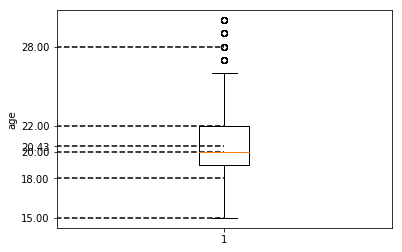

In [10]:
def show_responders_age_box_plot(data):
    data_median = median(data)
    sub_data_Q1 = list(filter(lambda x: x < data_median, data))
    sub_data_Q3 = list(filter(lambda x: x > data_median, data))
    Q1 = median(sub_data_Q1)
    Q3 = median(sub_data_Q3)
    IQR = Q3 - Q1
    flier_low = max(min(data), Q1 - 1.5 * IQR)
    flier_high = max(min(data), Q3 + 1.5 * IQR)
    fig, ax = plt.subplots()
    ax.boxplot(data, showfliers=True)
    plt.hlines(y=[flier_high, mean(data), Q1, Q3, data_median, flier_low], xmin=0, xmax=1, colors='k',
               linestyles='dashed')
    plt.yticks([flier_high, Q1, Q3, mean(data), data_median, flier_low])
    plt.ylabel("age")
    plt.show()

show_responders_age_box_plot(responders_ages)

Histogram przedstawiający wiek respondentów:

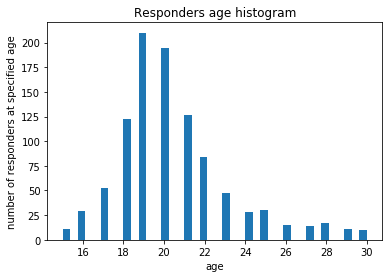

In [11]:
def show_responders_age_histogram(data, bin_count=40):
    plt.title("Responders age histogram")
    plt.xlabel("age")
    plt.ylabel("number of responders at specified age")
    plt.hist(data, bins=bin_count, range=(15, 30))
    plt.show()
   
show_responders_age_histogram(responders_ages)